In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 1.8 MB/s eta 0:00:00




```
# FRBsynthesis

```

# FRB synthesis and Data file

In [ ]:
from google.colab import drive ;
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!git clone https://github.com/liamconnor/single_pulse_ml.git

Cloning into 'single_pulse_ml'...
remote: Enumerating objects: 1718, done.
remote: Total 1718 (delta 0), reused 0 (delta 0), pack-reused 1718
Receiving objects: 100% (1718/1718), 78.69 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (1191/1191), done.


In [ ]:
#first change the tensorflow package to 'tensorflow'
%rm /content/single_pulse_ml/setup.py
%cp '/gdrive/MyDrive/setup.py' '/content/single_pulse_ml'
%cd '/content/single_pulse_ml'
!python3 setup.py install


/content/single_pulse_ml
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
      

In [ ]:
!python --version


Python 3.10.11


In [ ]:
%cd '/gdrive/'

/gdrive


In [ ]:
%rm '/usr/local/lib/python3.10/dist-packages/single_pulse_ml-0.1-py3.10.egg/single_pulse_ml/sim_parameters.py'
%cp '/gdrive/MyDrive/sim_parameters.py' '/usr/local/lib/python3.10/dist-packages/single_pulse_ml-0.1-py3.10.egg/single_pulse_ml/'

In [ ]:
#Goto /usr/local/lib/python3.8/dist-packages/single_pulse_ml-0.1-py3.8.egg/single_pulse_ml/sim_parameters.py and change line 88 to f = h5py.File(fnout, 'w')
#Now directly go to this path and run sims!
%cd /content/single_pulse_ml/single_pulse_ml

/content/single_pulse_ml/single_pulse_ml


In [ ]:
%rm '/content/single_pulse_ml/single_pulse_ml/run_frb_simulation.py'
%cp '/gdrive/MyDrive/run_frb_simulation.py' '/content/single_pulse_ml/single_pulse_ml/'

In [ ]:
!python run_frb_simulation.py

/content/single_pulse_ml/single_pulse_ml/simulate_frb.py:640: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if ftype is 'hdf5':
2023-05-15 03:25:11.079955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 03:25:12.131218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

Using 5000 false-positive triggers
Simulating 5000 FRBs

simulated:0 kept:0
simulated:500 kept:500
simulated:1000 kept:1000
simulated:1500 kept:1500
simulated:2000 kept:2000
simulated:2500 kept:2500
simulated:3000 kept:3000
simulated:3500 kept:3500
simulated:4000 kept:4000
simulated:4500 kept:4500
simulated:5000 kept:5000
simulated:5500 kept:5222
simulated:6000 kept:5440
simulated:6500 kept:5642
simulated:7000 kept:5869


# Data parse and Test train split

In [ ]:
import h5py
hf = h5py.File('/gdrive/MyDrive/data_nt64_nf32_dm0_snr5-25_apertif_250.hdf5', 'r')
hf.keys()

<KeysViewHDF5 ['data_dm_time', 'data_freq_time', 'labels', 'params', 'snr']>

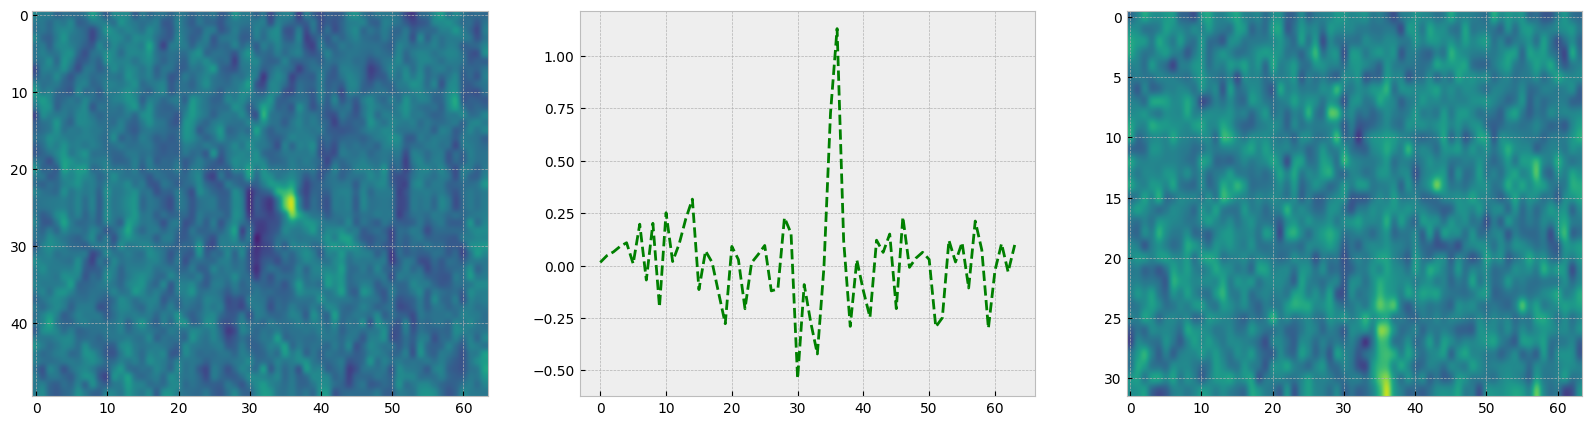

In [ ]:
import matplotlib.pyplot as plt ; plt.style.use('bmh')
import numpy as np


freq_time_dataset = np.array(hf['data_freq_time'])
dm_time_dataset = np.array(hf['data_dm_time'])
series_dataset = np.vstack(np.nanmean(hf['data_freq_time'],axis=1))
sn_set = np.array(hf['snr'])
label_set = np.array(hf['labels'])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(dm_time_dataset[5756],aspect='auto',interpolation='gaussian')
#plt.show()
plt.subplot(1,3,2)

plt.plot(np.mean(freq_time_dataset[5756],axis=0),'--',color='green')
plt.subplot(1,3,3)

plt.imshow(freq_time_dataset[5756],aspect='auto',interpolation='gaussian')


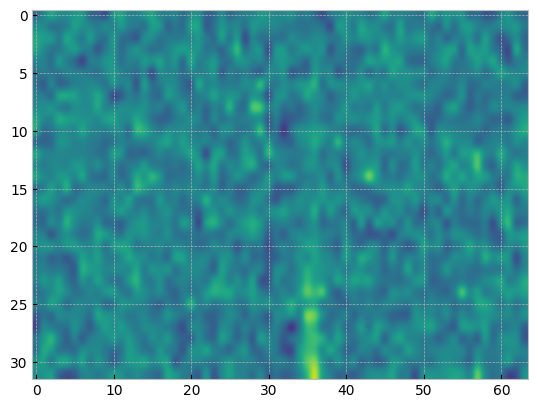

In [ ]:
plt.imshow(dm_time_dataset[5756],aspect='auto',interpolation='gaussian')

In [ ]:
dm_time_dataset[5756].shape

(50, 64)

(array([2211., 1200.,  653.,  397.,  247.,  157.,   81.,   36.,   13.,
           5.]),
 array([ 5.00038074,  6.52618938,  8.05199802,  9.57780666, 11.1036153 ,
        12.62942394, 14.15523258, 15.68104121, 17.20684985, 18.73265849,
        20.25846713]),
 <BarContainer object of 10 artists>)

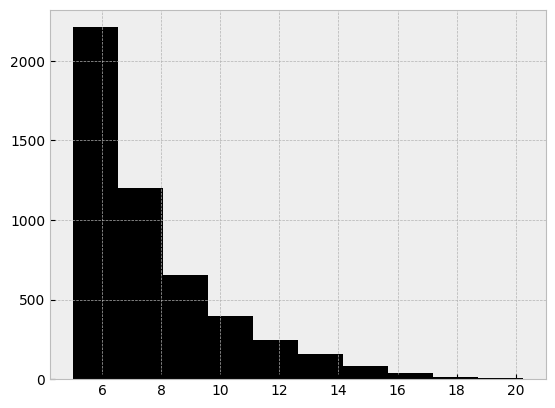

In [ ]:
plt.hist(sn_set,color='black')


In [ ]:
dm_time_dataset.shape

(10000, 50, 64)

In [ ]:
#shuffle the data_set
np.random.seed(777) #preserve seed for later use
idx = np.random.permutation(len(freq_time_dataset)) #preservers index
ft_sim_set = freq_time_dataset[idx] ; y_sim_set = label_set[idx]
dm_sim_set = dm_time_dataset[idx] ; series_sim_set = series_dataset[idx]
snr = sn_set[np.random.permutation(len(sn_set))]


In [ ]:
y_sim_set

array([1, 0, 1, ..., 0, 1, 0])

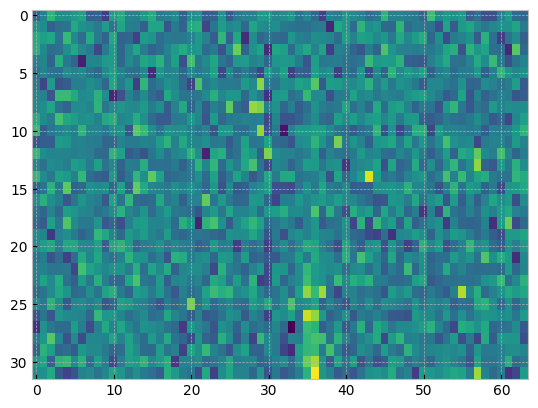

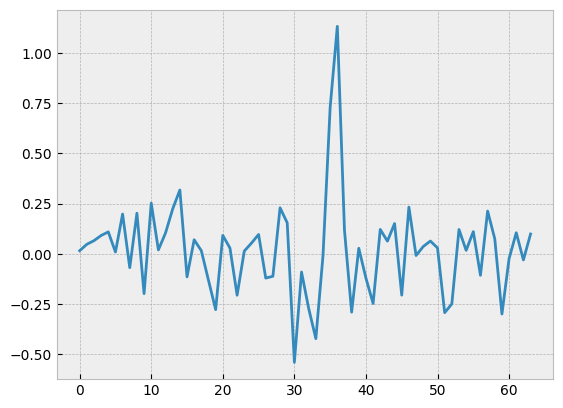

In [ ]:
#test the shuffling
plt.imshow(ft_sim_set[0],aspect='auto')
plt.show()
plt.plot(series_sim_set[0])

In [ ]:
!pip install np_utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=5878ee020c610dacbf6bd094f470976a78f43421931d14b44faab6e58ddc7686
  Stored in directory: /root/.cache/pip/wheels/65/07/4b/1c96f437e1bec60b3d2acd0b81d0a7969505f5251efbb5a060
Successfully built np_utils


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D, MaxPooling1D , Dropout , Flatten ,Conv1D , Activation
from keras.utils import to_categorical

def test_train_CNN(array1,array2,dmdata=True):

  if dmdata==False:
    #regular 80% split
    x_train = array1[0:8000] ; y_train = array2[0:8000]
    x_test = array1[8000:10000] ; y_test = array2[8000:10000]
    x_train = x_train.reshape((8000,32,64,1)) #4d reshape for CNN
    x_test = x_test.reshape((2000,32,64,1))
    y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
    #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
    #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1

    x_train = x_train.reshape((x_train.shape[0], 32 * 64 * 1))
    x_test = x_test.reshape((x_test.shape[0], 32 * 64 * 1))

  if dmdata==True:

    x_train = array1[0:8000] ; y_train = array2[0:8000]
    x_test = array1[8000:10000] ; y_test = array2[8000:10000]
    x_train = x_train.reshape((8000,50,64,1)) #4d reshape for CNN
    x_test = x_test.reshape((2000,50,64,1))

    #y_train = to_categorical(y_train) ; y_test = to_categorical(y_test)

    y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
    #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
    #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1



  return [x_train,y_train,x_test,y_test]

def test_train_series(array1,array2):
  x_train = array1[0:8000] ; y_train = array2[0:8000]
  x_test = array1[8000:10000] ; y_test = array2[8000:10000]

  x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1)) #(8000,64,1)
  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
  #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
  #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1

  return [x_train,y_train,x_test,y_test]

In [ ]:
test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0].shape

(8000, 2048)

#GA backend

In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(self,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.

input_layer = tensorflow.keras.layers.Input(shape=(32, 64, 1))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=3,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(5,5),
                                                 strides=5)(conv_layer1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)
dense_layer = tensorflow.keras.layers.Dense(15, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(dense_layer)


#input_layer = tensorflow.keras.layers.Input(shape=(32*64))
#dense_layer_1 = tensorflow.keras.layers.Dense(1024,activation="relu")(input_layer)
#dense_layer_2 = tensorflow.keras.layers.Dense(256,activation="relu")(dense_layer_1)
#dense_layer_3 = tensorflow.keras.layers.Dense(128,activation="relu")(dense_layer_2)
#output_layer = tensorflow.keras.layers.Dense(1,activation="sigmoid")(dense_layer_3)



model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0]
data_outputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[1]

# Data outputs
#data_outputs = numpy.load("dataset_outputs.npy")
#data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)

num_generations = 300
num_parents_mating = 10
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Categorical Crossentropy : ", bce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

SECOND NET

In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(self,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.
'''
input_layer = tensorflow.keras.layers.Input(shape=(32, 64, 1))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=3,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2),
                                                 strides=(2,2))(conv_layer1)
drop_1 = tensorflow.keras.layers.Dropout(0.6)(max_pool1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(drop_1)
max_pool2 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2),
                                                 strides=(2,2))(conv_layer2)
flatten_layer  = tensorflow.keras.layers.Flatten()(max_pool2)
drop_2 = tensorflow.keras.layers.Dropout(0.5)(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(drop_2)

'''
input_layer = tensorflow.keras.layers.Input(shape=(32*64))
dense_layer_1 = tensorflow.keras.layers.Dense(2048,activation="relu")(input_layer)
dense_layer_2 = tensorflow.keras.layers.Dense(1024,activation="relu")(dense_layer_1)
dense_layer_3 = tensorflow.keras.layers.Dense(256,activation="relu")(dense_layer_2)
output_layer = tensorflow.keras.layers.Dense(1,activation="sigmoid")(dense_layer_3)



model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0]
data_outputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[1]

# Data outputs
#data_outputs = numpy.load("dataset_outputs.npy")
#data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)

num_generations = 100
num_parents_mating = 2
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation,
                       mutation_type="adaptive",
                       mutation_probability=[0.6,0.2])
ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Categorical Crossentropy : ", bce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

250/250 [==============================] - 3s 12ms/step
Generation = 1
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 13ms/step
Generation = 2
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 11ms/step
Generation = 3
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 11ms/step
Generation = 4
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 12ms/step
Generation = 5
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 11ms/step
Generation = 6
250/250 [==============================] - 3s 11ms/step
Fitness    = 1.3478987145403936
250/250 [==============================] - 3s 

In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(self,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.
'''
input_layer = tensorflow.keras.layers.Input(shape=(32, 64, 1))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=3,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2),
                                                 strides=(2,2))(conv_layer1)
drop_1 = tensorflow.keras.layers.Dropout(0.6)(max_pool1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(drop_1)
max_pool2 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2),
                                                 strides=(2,2))(conv_layer2)
flatten_layer  = tensorflow.keras.layers.Flatten()(max_pool2)
drop_2 = tensorflow.keras.layers.Dropout(0.5)(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(drop_2)

'''

input_layer = tensorflow.keras.layers.Input(shape=(64,1))
conv_1d = tensorflow.keras.layers.Conv1D(32,(5),strides=(2),activation="relu")(input_layer)
maxpool1d =  tensorflow.keras.layers.MaxPooling1D()(conv_1d)
conv_1d_2 = tensorflow.keras.layers.Conv1D(64,(5),strides=(2),activation="relu")(maxpool1d)
flatten_layer = tensorflow.keras.layers.Flatten()(conv_1d_2)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(flatten_layer)





model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0]
data_outputs = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[1]

# Data outputs
#data_outputs = numpy.load("dataset_outputs.npy")
#data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)

num_generations = 100
num_parents_mating = 2
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation,
                       mutation_type="adaptive",
                       mutation_probability=[0.6,0.2])
ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Categorical Crossentropy : ", bce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

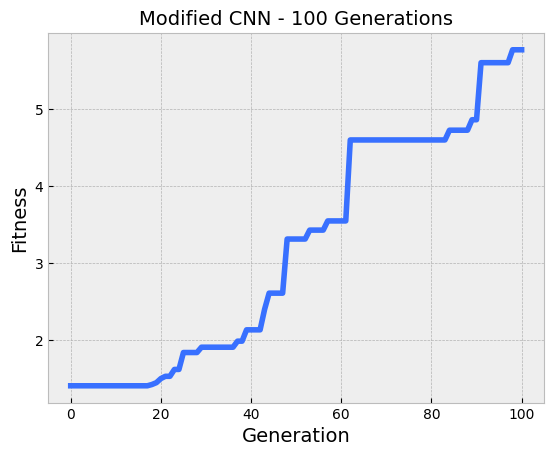

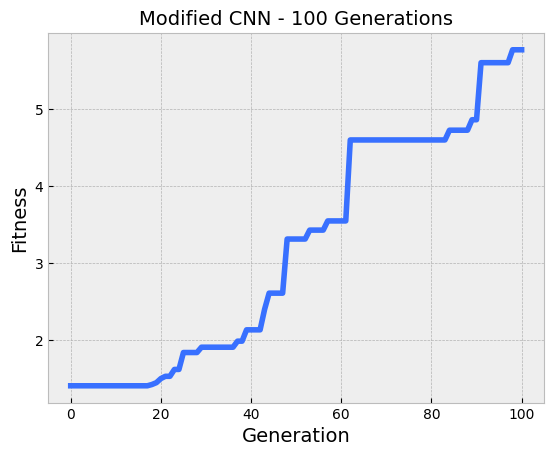

In [ ]:
ga_instance.plot_result(title="Modified CNN - 100 Generations", linewidth=4)


In [ ]:
model.save('/content/100_gen_model_2p.h5')

In [ ]:

pred = model.predict(test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[2])

63/63 [==============================] - 1s 12ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = pred
y_true = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[3]
y_pred = np.round(y_pred)

confusion_matrix(y_true,y_pred,labels=[0,1])
tn, fp, fn, tp = confusion_matrix(y_true.flatten(),y_pred.flatten(),labels=[0,1]).ravel()
print('Accuracy for ft model', (tn+tp)/(tn+tp+fn+fp))

Accuracy for ft model 0.958


In [ ]:
(tp)/(tp+fp)

0.9648760330578512

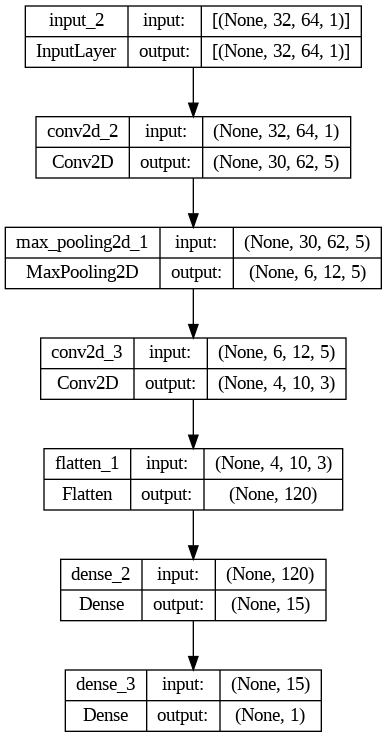

In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
input_layer = tensorflow.keras.layers.Input(shape=(32, 64, 1))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=3,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(5,5),
                                                 strides=5)(conv_layer1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)
dense_layer = tensorflow.keras.layers.Dense(15, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(dense_layer)

new_model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)
new_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
new_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 64, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 62, 5)         50        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 12, 5)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 10, 3)          138       
                                                                 
 flatten_4 (Flatten)         (None, 120)               0         
                                                                 
 dense_5 (Dense)             (None, 15)                1815      
                                                           

In [ ]:
history_2 = new_model.fit(
    test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0],test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[1],
    batch_size=50,
    epochs=100,
    #callbacks=callbacks,
    validation_split=0.1,
    verbose=1,
)

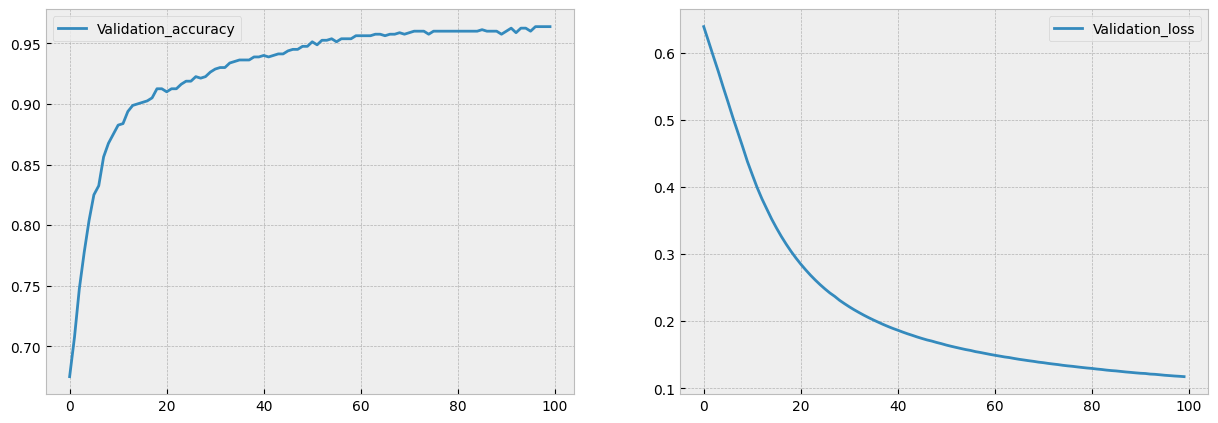

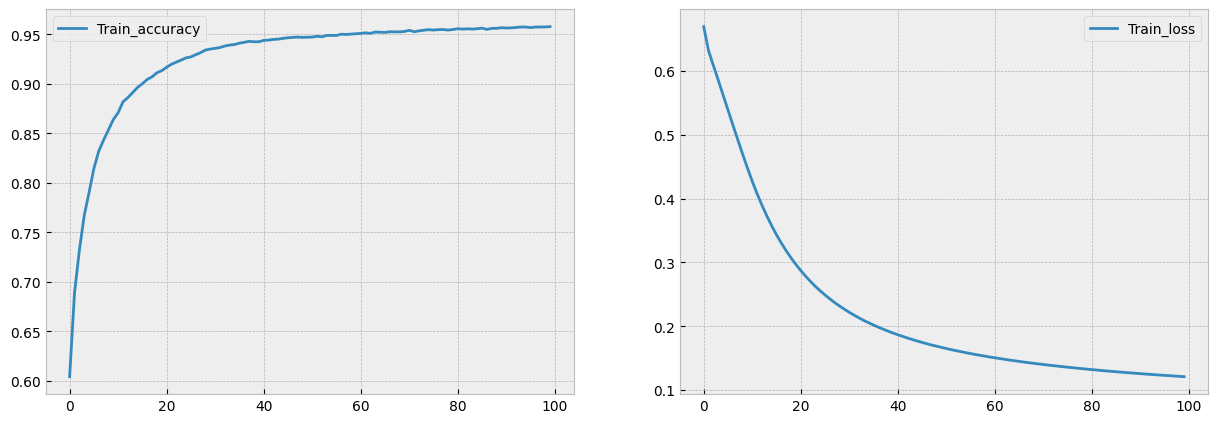

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(new_model.history.history['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(new_model.history.history['val_loss'],label='Validation_loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(new_model.history.history['accuracy'],label='Train_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(new_model.history.history['loss'],label='Train_loss')
plt.legend()